# Name: Zaid Mukaddam
# Roll No: K039
# Batch: 1

### Important Variables compared to dataset and model
```text
x -> feature vector (Years of Experience)
y -> response vector (Salary)


Intercept: b0 (Model's intercept)
Slope: b1 (Model's coefficients)
```

### Linear Regression Equation
```text
y = b0 + b1*x
```

# Important Imports

In [17]:
# Import Pandas for processing data files, and CSV files.
# pd.read_csv('sample.csv)
import pandas as pd
# Import Numpy Libraries
import numpy as np
# import num2words for converting numbers to words
from num2words import num2words

# Load the data from the CSV file and structure it for use in the model

In [18]:
# Read datasets
data: pd.DataFrame = pd.read_csv('https://raw.githubusercontent.com/zaidmukaddam/AIML_Lab/main/Lab1/income_data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [19]:
# Assign and structure and datasets.
# We call .reshape() on x and y because these array must be two-dimensional, or more precisely, 
# it must have one column and as many rows as necessary. 
# That's exactly what the argument (-1, 1) of .reshape() specifies.
x = data.YearsExperience.values.reshape(-1, 1) # feature matrix
y = data.Salary.values.reshape(-1, 1) # response vector

# Model Building and Training

In [20]:
# Compute model
# Import from sklearn and train
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0
)

In [21]:
# Linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x, y)

LinearRegression()

# Performance and Model Evaluation

In [22]:
# Predict next salary for a given years of experience
exp = float(input('Enter years of experience: '))
next_salary = int(model.predict([[exp]]))

y_predict = model.predict(X_test)

# Print prediction
print(f"{num2words(next_salary)} : {next_salary}")

sixty-seven thousand, six hundred and eight : 67608


In [23]:
# From the training data
prediction_train = model.predict(X_train)
print("R Square score train :", r2_score(y_train, prediction_train))
print("Mean Square Error :", mean_squared_error(y_train, prediction_train))
print("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_train, prediction_train)))

R Square score train : 0.941799590058557
Mean Square Error : 35468383.03774474
Root Mean Square Error:  5955.53381635473


In [24]:
# From the test data and the prediction
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_predict))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_predict))

Coefficients: [[9449.96232146]]
Intercept: [25792.20019867]
Mean squared error (MSE): 21476945.32
Coefficient of determination (R^2): 0.98


## The equation of the model created 
### y = 25792.20019867 + 9449.96232146*x

In [25]:
# The Score of the model
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))
# Returns float

Training set score: 0.941800
Test set score: 0.976197


# Plotting

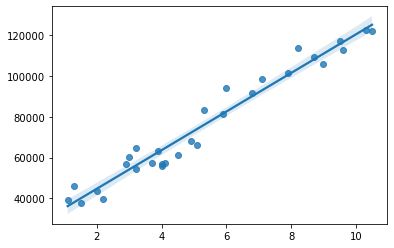

In [26]:
import seaborn as sns
# The regplot() function is employed to draw the regression plots.
sns.regplot(x=x, y=y)